In [1]:
from sklearn.datasets import fetch_mldata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
plt.style.use('seaborn')

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [0]:
from keras.utils import to_categorical

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

In [0]:
rnd_clf = RandomForestClassifier()

In [11]:
rnd_clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
rnd_clf.score(X_train, y_train)

0.9991333333333333

In [13]:
rnd_clf.score(X_test, y_test)

0.9493

In [0]:
y_pred = rnd_clf.predict(X_test)

In [15]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [16]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
y_proba = rnd_clf.predict_proba(X_test)

In [18]:
y_proba

array([[0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0.8, ..., 0. , 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.1, 0.1],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [0]:
from sklearn.metrics import classification_report

In [0]:
clf_report = classification_report(y_test, y_pred)

In [21]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.99      0.99      1135
           2       0.95      0.95      0.95      1032
           3       0.92      0.94      0.93      1010
           4       0.95      0.96      0.95       982
           5       0.94      0.92      0.93       892
           6       0.97      0.96      0.96       958
           7       0.97      0.95      0.96      1028
           8       0.94      0.91      0.92       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [0]:
from keras import models, layers

In [0]:
(X_train_2, y_train_2), (X_test_2, y_test_2) = mnist.load_data()

In [24]:
print(X_train_2.shape)
print(X_test_2.shape)
print()
print(y_train_2.shape)
print(y_test_2.shape)

(60000, 28, 28)
(10000, 28, 28)

(60000,)
(10000,)


In [0]:
X_train_2 = X_train_2.reshape(-1, 28, 28,1)
X_test_2 = X_test_2.reshape(-1, 28, 28,1)

In [0]:
y_train_2 = to_categorical(y_train_2)
y_test_2 = to_categorical(y_test_2)

In [0]:
input_tensor = layers.Input(shape = (28, 28,1))

x = layers.Conv2D(128, 3, activation='relu', padding='same')(input_tensor)
x = layers.MaxPooling2D(2)(x)

x_1 = layers.SeparableConv2D(128, 3, activation='relu', padding='same')(input_tensor)
x_1 = layers.SeparableConv2D(128, 3, activation='relu', padding='same')(x_1)
x_1 = layers.SeparableConv2D(128, 3, activation='relu', strides=2, padding='same')(x_1)

x_3 = layers.MaxPooling2D(2, padding='same')(input_tensor)
x_3 = layers.Conv2D(128, 3, activation='relu', padding='same')(x_3)

concat = layers.Concatenate()([x, x_1, x_3])

shaper = layers.Conv2D(384, 3, strides=2, padding='same', activation='relu')(input_tensor)

add = layers.Add()([shaper, concat])

gb = layers.GlobalAveragePooling2D()(add)

output = layers.Dense(10, activation='softmax')(gb)



In [0]:
model = models.Model(input_tensor, output)

In [41]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
separable_conv2d_4 (SeparableCo (None, 28, 28, 128)  265         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 28, 28, 128)  1280        input_2[0][0]                    
__________________________________________________________________________________________________
separable_conv2d_5 (SeparableCo (None, 28, 28, 128)  17664       separable_conv2d_4[0][0]         
__________________________________________________________________________________________________
max_poolin

In [0]:
from keras.utils import plot_model
from keras.preprocessing import image
from keras import optimizers
from keras import callbacks
from tensorboardcolab import *

In [42]:
tbc=TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
http://831928d1.ngrok.io


In [0]:
plot_model(model, 'test_model.png')

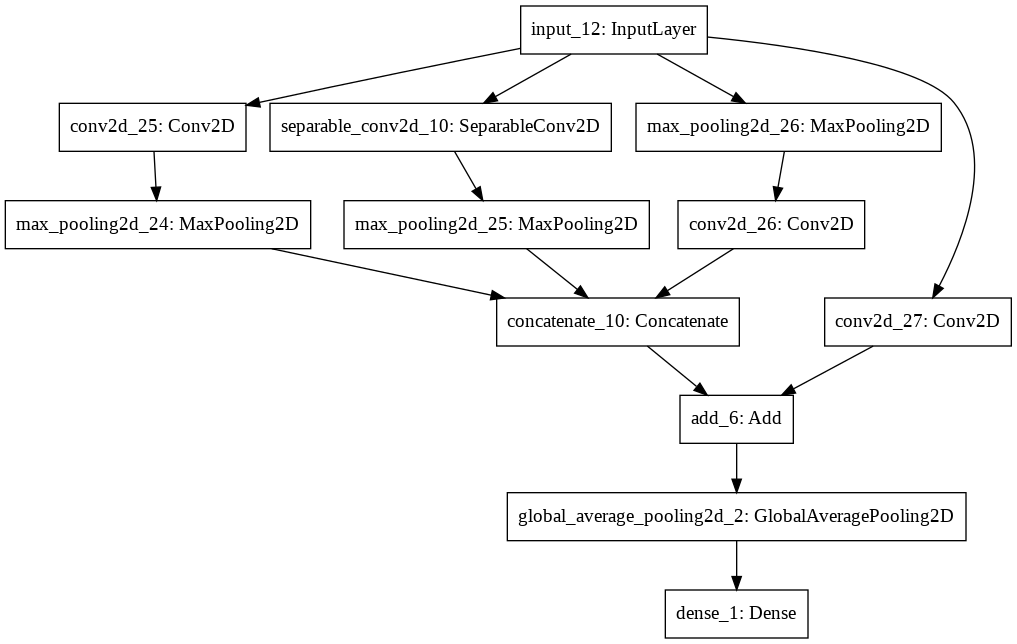

In [0]:
image.load_img('test_model.png')

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
model.fit(X_train_2, y_train_2, epochs=20, batch_size=128, validation_data=(X_test_2, y_test_2), callbacks=[TensorBoardColabCallback(tbc)])

W0729 01:21:24.263358 139946625206144 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0729 01:21:24.428842 139946625206144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0729 01:21:24.971556 139946625206144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/tensorboardcolab/core.py:49: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Train on 60000 samples, validate on 10000 samples


W0729 01:21:28.086723 139946625206144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.



Epoch 1/20
60000/60000 [==============================] - 35s 585us/step - loss: 2.8325 - acc: 0.5076 - val_loss: 2.1680 - val_acc: 0.7095
Epoch 2/20
60000/60000 [==============================] - 32s 528us/step - loss: 2.1047 - acc: 0.7559 - val_loss: 1.9333 - val_acc: 0.8036
Epoch 3/20
60000/60000 [==============================] - 32s 529us/step - loss: 1.9335 - acc: 0.8111 - val_loss: 1.8097 - val_acc: 0.8480
Epoch 4/20
60000/60000 [==============================] - 32s 527us/step - loss: 1.8716 - acc: 0.8299 - val_loss: 1.7823 - val_acc: 0.8503
Epoch 5/20
60000/60000 [==============================] - 32s 530us/step - loss: 1.8411 - acc: 0.8395 - val_loss: 1.7783 - val_acc: 0.8531
Epoch 6/20
60000/60000 [==============================] - 32s 528us/step - loss: 1.8217 - acc: 0.8440 - val_loss: 1.7650 - val_acc: 0.8566
Epoch 7/20
60000/60000 [==============================] - 32s 530us/step - loss: 1.8027 - acc: 0.8508 - val_loss: 1.7645 - val_acc: 0.8573
Epoch 8/20
60000/60000 [===

In [44]:
model.fit(X_train_2, y_train_2, epochs=30, batch_size=128, validation_data=(X_test_2, y_test_2), callbacks=[TensorBoardColabCallback(tbc, histogram_freq=1)])

Train on 60000 samples, validate on 10000 samples


W0729 01:38:31.725603 139946625206144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/callbacks.py:848: The name tf.summary.histogram is deprecated. Please use tf.compat.v1.summary.histogram instead.



Epoch 1/30
60000/60000 [==============================] - 32s 537us/step - loss: 1.6106 - acc: 0.4653 - val_loss: 0.9846 - val_acc: 0.7086
Epoch 2/30
60000/60000 [==============================] - 32s 528us/step - loss: 0.6923 - acc: 0.7898 - val_loss: 0.4398 - val_acc: 0.8720
Epoch 3/30
60000/60000 [==============================] - 32s 531us/step - loss: 0.4173 - acc: 0.8711 - val_loss: 0.2923 - val_acc: 0.9132
Epoch 4/30
60000/60000 [==============================] - 32s 529us/step - loss: 0.3152 - acc: 0.9019 - val_loss: 0.2608 - val_acc: 0.9242
Epoch 5/30
60000/60000 [==============================] - 32s 529us/step - loss: 0.2576 - acc: 0.9198 - val_loss: 0.2239 - val_acc: 0.9289
Epoch 6/30
60000/60000 [==============================] - 32s 531us/step - loss: 0.2222 - acc: 0.9312 - val_loss: 0.1853 - val_acc: 0.9437
Epoch 7/30
60000/60000 [==============================] - 32s 532us/step - loss: 0.2017 - acc: 0.9373 - val_loss: 0.1830 - val_acc: 0.9434
Epoch 8/30
60000/60000 [===

In [74]:
model.evaluate(X_test_2, y_test_2)

10000/10000 [==============================] - 2s 244us/step


[0.07550090784002095, 0.976]

## ensemble rnd_clf and model  1 & 2 

In [45]:
y_proba

array([[0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0.8, ..., 0. , 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.1, 0.1],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [0]:
nn_predict = model.predict(X_test_2)

In [48]:
nn_predict

array([[1.6318259e-09, 6.9110460e-11, 1.1613632e-09, ..., 9.9968541e-01,
        1.0053901e-10, 3.1428738e-04],
       [2.3352457e-06, 2.2597760e-08, 9.9992406e-01, ..., 6.4622245e-06,
        4.8381201e-09, 5.9424321e-05],
       [6.4746120e-05, 9.9963462e-01, 3.3361704e-07, ..., 1.7710777e-04,
        1.4933416e-09, 1.5639127e-06],
       ...,
       [9.8864994e-10, 1.3330694e-08, 2.4961869e-10, ..., 1.3810427e-06,
        1.1671634e-06, 5.3368545e-05],
       [1.8369933e-04, 2.2847221e-11, 4.9832830e-05, ..., 6.5622490e-09,
        3.8833506e-02, 1.3807665e-05],
       [1.6906780e-04, 1.6631577e-13, 1.7116787e-05, ..., 2.6660792e-14,
        3.6819390e-04, 1.8564242e-05]], dtype=float32)

In [49]:
nn_predict[0]

array([1.6318259e-09, 6.9110460e-11, 1.1613632e-09, 3.7206513e-10,
       5.6730856e-11, 3.1457810e-07, 1.8206912e-12, 9.9968541e-01,
       1.0053901e-10, 3.1428738e-04], dtype=float32)

In [51]:
np.argmax(nn_predict[0])

7

In [54]:
image.array_to_img(X_test_2[0])

In [55]:
y_proba[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [0]:
nn_predict_df = pd.DataFrame(nn_predict)

rnd_predict_df = pd.DataFrame(y_proba)

In [58]:
nn_predict_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.631826e-09,6.911046e-11,1.161363e-09,3.720651e-10,5.673086e-11,3.145781e-07,1.820691e-12,9.996854e-01,1.005390e-10,0.000314
1,2.335246e-06,2.259776e-08,9.999241e-01,1.513298e-08,2.812752e-10,5.425276e-06,2.128834e-06,6.462225e-06,4.838120e-09,0.000059
2,6.474612e-05,9.996346e-01,3.336170e-07,6.323944e-13,1.132212e-04,2.859217e-07,8.118137e-06,1.771078e-04,1.493342e-09,0.000002
3,9.974975e-01,5.223240e-07,2.095439e-05,1.030232e-11,2.392632e-04,2.719331e-06,2.223588e-03,7.779422e-07,3.923881e-06,0.000011
4,8.062823e-05,1.025123e-04,2.946544e-05,2.137372e-08,9.991748e-01,2.167609e-06,1.043140e-04,9.663773e-06,5.418704e-06,0.000491


In [59]:
rnd_predict_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.8,0.0,0.1,0.1,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.1,0.0,0.0


In [0]:
ensemble_proba_mean = np.mean([y_proba, nn_predict], axis=0)

In [0]:
ensemble_predict_label = np.argmax(ensemble_proba_mean, axis=1)

In [0]:
from sklearn.metrics import accuracy_score

In [73]:
accuracy_score(y_test, ensemble_predict_label)

0.9821

In [75]:
print(X_train.shape)

(60000, 784)


In [99]:
seq_model = models.Sequential()
seq_model.add(layers.Flatten(input_shape=(28,28,1)))
seq_model.add(layers.Dense(64, activation='relu'))
seq_model.add(layers.BatchNormalization())
seq_model.add(layers.Dense(128, activation='relu'))
seq_model.add(layers.BatchNormalization())
seq_model.add(layers.Dense(256, activation='relu'))
seq_model.add(layers.BatchNormalization())
seq_model.add(layers.Dense(256, activation='relu'))
seq_model.add(layers.Dense(10, activation='softmax'))

seq_model.summary()
seq_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 64)                50240     
_________________________________________________________________
batch_normalization_7 (Batch (None, 64)                256       
_________________________________________________________________
dense_26 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_8 (Batch (None, 128)               512       
_________________________________________________________________
dense_27 (Dense)             (None, 256)               33024     
_________________________________________________________________
batch_normalization_9 (Batch (None, 256)               1024      
__________

In [101]:
seq_model.fit(X_train_2, y_train_2, batch_size=128, epochs=50, validation_data=(X_test_2, y_test_2), callbacks=[TensorBoardColabCallback(tbc_6)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 118us/step - loss: 0.2459 - acc: 0.9224 - val_loss: 0.1270 - val_acc: 0.9603
Epoch 2/50
60000/60000 [==============================] - 6s 97us/step - loss: 0.0997 - acc: 0.9684 - val_loss: 0.0893 - val_acc: 0.9729
Epoch 3/50
60000/60000 [==============================] - 6s 99us/step - loss: 0.0693 - acc: 0.9778 - val_loss: 0.1024 - val_acc: 0.9700
Epoch 4/50
60000/60000 [==============================] - 6s 99us/step - loss: 0.0569 - acc: 0.9810 - val_loss: 0.1127 - val_acc: 0.9674
Epoch 5/50
60000/60000 [==============================] - 6s 101us/step - loss: 0.0479 - acc: 0.9844 - val_loss: 0.0918 - val_acc: 0.9730
Epoch 6/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.0420 - acc: 0.9860 - val_loss: 0.1050 - val_acc: 0.9709
Epoch 7/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.0360 - acc: 0.9881 - val_loss: 0.1010 - val_a

In [102]:
seq_model.evaluate(X_test_2, y_test_2)

10000/10000 [==============================] - 1s 106us/step


[0.10228904174560512, 0.9818]

In [0]:
seq_predict = seq_model.predict(X_test_2)

In [0]:
seq_predict_df = pd.DataFrame(seq_predict)

## ensemble 1 & 3

In [0]:
ensemble_proba_mean_3 = np.mean([y_proba, seq_predict], axis=0)

In [0]:
three_models_ensemble = np.argmax(ensemble_proba_mean_3, axis=1)

In [113]:
accuracy_score(y_test, three_models_ensemble)

0.9828

## ensemble 1 & 2 & 3

In [0]:
ensemble_proba_mean_2 = np.mean([y_proba, nn_predict, seq_predict], axis=0)

In [0]:
three_models_ensemble = np.argmax(ensemble_proba_mean_2, axis=1)

In [109]:
accuracy_score(y_test, three_models_ensemble)

0.9877

# Result,

1) Random Forest Classifier (w/o tunning) : its accuracy score is   Val : 94.9

2) Multiple Conv model(testing) : val : 97.6

3) Flat and Dense model(testing) : val : 98.18


ensemble 1 & 2 : score : val : 98.21

ensemble 1 & 3 : score : val : 98.28

ensemble 1 & 2 & 3 : score : val : 98.77

so, ensemble diversity models are definetly works well to classify the classes